# Notebook 02 — Analysis: Members vs Casual Riders (May 2024)

## Question
How do **annual members** and **casual riders** use Cyclistic bikes differently?

## Why this matters
Annual members are generally more profitable for the business. Understanding behavioral differences helps the marketing team design strategies that convert casual riders into members.



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 140)



In [10]:
clean_path = "../data_cleaned/cyclistic_may2024_cleaned.csv"
df = pd.read_csv(clean_path)

print("Shape:", df.shape)
df.head()



Shape: (609232, 18)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_minutes,day_of_week,hour,date,is_weekend
0,7D9F0CE9EC2A1297,classic_bike,2024-05-25 15:52:42,2024-05-25 16:11:50,Streeter Dr & Grand Ave,13022,Clark St & Elm St,TA1307000039,41.892278,-87.612043,41.902973,-87.631280,casual,19.133333,Saturday,15,2024-05-25,True
1,02EC47687411416F,classic_bike,2024-05-14 15:11:51,2024-05-14 15:22:00,Sheridan Rd & Greenleaf Ave,KA1504000159,Sheridan Rd & Loyola Ave,RP-009,42.010587,-87.662412,42.001044,-87.661198,casual,10.150000,Tuesday,15,2024-05-14,False
2,101370FB2D3402BE,classic_bike,2024-05-30 17:46:04,2024-05-30 18:09:16,Streeter Dr & Grand Ave,13022,Wabash Ave & 9th St,TA1309000010,41.892278,-87.612043,41.870769,-87.625734,member,23.200000,Thursday,17,2024-05-30,False
3,E97E396331ED6913,electric_bike,2024-05-17 20:21:54,2024-05-17 20:40:32,Streeter Dr & Grand Ave,13022,Sheffield Ave & Wellington Ave,TA1307000052,41.892270,-87.611946,41.936253,-87.652662,member,18.633333,Friday,20,2024-05-17,False
4,674EDE311C543165,classic_bike,2024-05-22 18:52:20,2024-05-22 18:59:04,Larrabee St & Division St,KA1504000079,Clark St & Elm St,TA1307000039,41.903486,-87.643353,41.902973,-87.631280,casual,6.733333,Wednesday,18,2024-05-22,False


In [11]:
df.columns.tolist()



['ride_id',
 'rideable_type',
 'started_at',
 'ended_at',
 'start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'start_lat',
 'start_lng',
 'end_lat',
 'end_lng',
 'member_casual',
 'ride_length_minutes',
 'day_of_week',
 'hour',
 'date',
 'is_weekend']

In [12]:
counts = df["member_casual"].value_counts()
counts



member_casual
member    378317
casual    230915
Name: count, dtype: int64

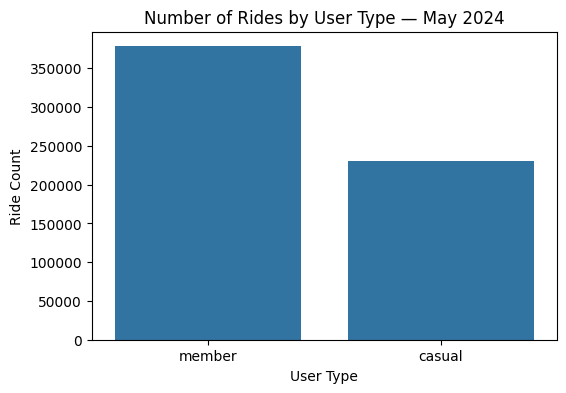

In [13]:
plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values)
plt.title("Number of Rides by User Type — May 2024")
plt.xlabel("User Type")
plt.ylabel("Ride Count")
plt.show()



## Insight 1 — Volume
This chart shows the total number of rides taken by each customer type in May 2024. This provides baseline context for interpreting differences in behavior.


In [14]:
avg_len = df.groupby("member_casual")["ride_length_minutes"].mean().sort_values(ascending=False)
avg_len


member_casual
casual    27.748668
member    13.494063
Name: ride_length_minutes, dtype: float64

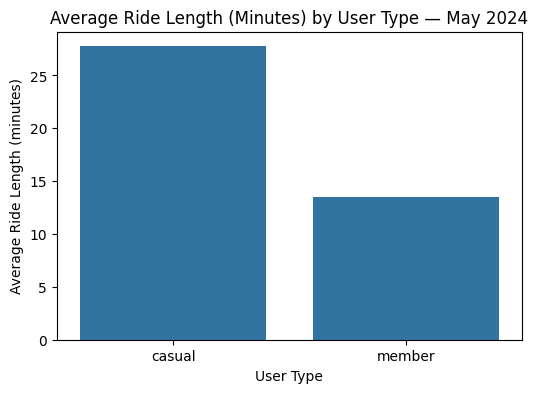

In [15]:
avg_len_df = avg_len.reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=avg_len_df, x="member_casual", y="ride_length_minutes")
plt.title("Average Ride Length (Minutes) by User Type — May 2024")
plt.xlabel("User Type")
plt.ylabel("Average Ride Length (minutes)")
plt.show()


## Insight 2 — Trip duration
Average trip duration helps indicate whether riders are using bikes for short, routine trips (often commuting) or longer leisure rides.


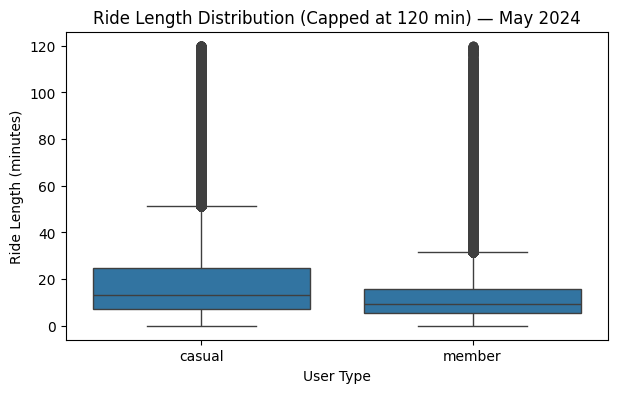

In [16]:
# To reduce the impact of extreme long rides on the visual, cap at 120 minutes for plotting only
plot_df = df[df["ride_length_minutes"] <= 120]

plt.figure(figsize=(7,4))
sns.boxplot(data=plot_df, x="member_casual", y="ride_length_minutes")
plt.title("Ride Length Distribution (Capped at 120 min) — May 2024")
plt.xlabel("User Type")
plt.ylabel("Ride Length (minutes)")
plt.show()


## Insight 3 — Distribution (not just averages)
Averages can hide variability. A distribution view shows whether one group has consistently longer rides or simply more outliers.


In [17]:
dow_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

rides_by_dow = (
    df.groupby(["day_of_week", "member_casual"])
      .size()
      .reset_index(name="ride_count")
)

rides_by_dow["day_of_week"] = pd.Categorical(rides_by_dow["day_of_week"], categories=dow_order, ordered=True)
rides_by_dow = rides_by_dow.sort_values("day_of_week")

rides_by_dow.head()


,day_of_week,member_casual,ride_count
2,Monday,casual,24300
3,Monday,member,43111
10,Tuesday,casual,19776
11,Tuesday,member,47881
12,Wednesday,casual,33553


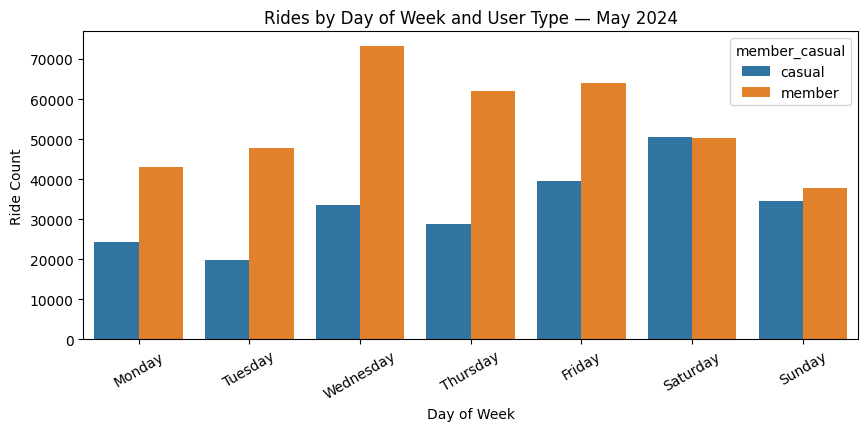

In [18]:
plt.figure(figsize=(10,4))
sns.barplot(data=rides_by_dow, x="day_of_week", y="ride_count", hue="member_casual")
plt.title("Rides by Day of Week and User Type — May 2024")
plt.xlabel("Day of Week")
plt.ylabel("Ride Count")
plt.xticks(rotation=30)
plt.show()


## Insight 4 — Weekday vs weekend behavior
Differences by day-of-week help distinguish commuting behavior (weekday heavy) vs leisure behavior (weekend heavy).


In [19]:
avg_len_dow = (
    df.groupby(["day_of_week", "member_casual"])["ride_length_minutes"]
      .mean()
      .reset_index()
)

avg_len_dow["day_of_week"] = pd.Categorical(avg_len_dow["day_of_week"], categories=dow_order, ordered=True)
avg_len_dow = avg_len_dow.sort_values("day_of_week")

avg_len_dow.head()


,day_of_week,member_casual,ride_length_minutes
2,Monday,casual,27.610516
3,Monday,member,13.248239
10,Tuesday,casual,22.904505
11,Tuesday,member,12.569385
12,Wednesday,casual,24.112869


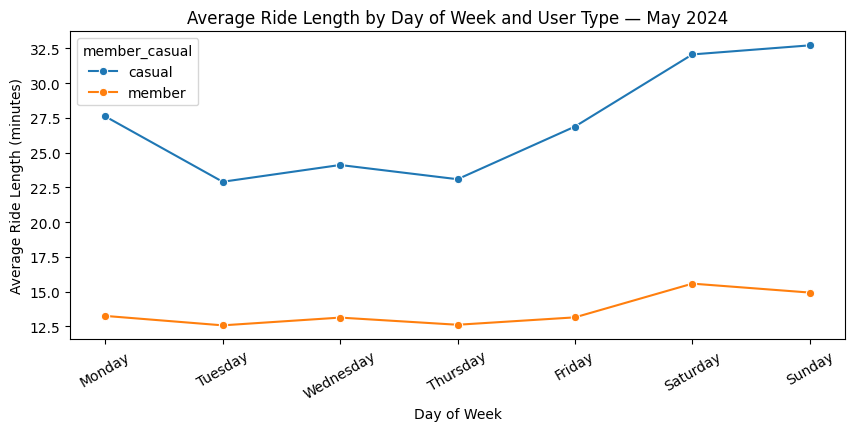

In [20]:
plt.figure(figsize=(10,4))
sns.lineplot(data=avg_len_dow, x="day_of_week", y="ride_length_minutes", hue="member_casual", marker="o")
plt.title("Average Ride Length by Day of Week and User Type — May 2024")
plt.xlabel("Day of Week")
plt.ylabel("Average Ride Length (minutes)")
plt.xticks(rotation=30)
plt.show()


## Insight 5 — When long rides happen
This shows whether longer rides cluster on weekends (typical of leisure use), or remain stable across the week (typical of routine commuting).


In [21]:
bike_type = (
    df.groupby(["rideable_type", "member_casual"])
      .size()
      .reset_index(name="ride_count")
)

bike_type.head()


,rideable_type,member_casual,ride_count
0,classic_bike,casual,116633
1,classic_bike,member,190133
2,electric_bike,casual,114282
3,electric_bike,member,188184


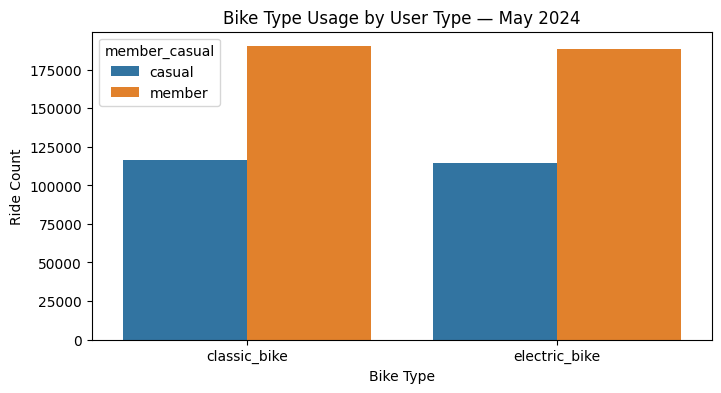

In [22]:
plt.figure(figsize=(8,4))
sns.barplot(data=bike_type, x="rideable_type", y="ride_count", hue="member_casual")
plt.title("Bike Type Usage by User Type — May 2024")
plt.xlabel("Bike Type")
plt.ylabel("Ride Count")
plt.show()


# Draft Executive Summary (to refine later)

Based on May 2024 data:
- Compare ride counts (members vs casual)
- Compare average ride length (members vs casual)
- Identify weekday vs weekend differences
- Identify whether casual riders behave more like leisure users
- Identify bike-type preferences that could inform marketing or product decisions

Next: turn these findings into 3 clear recommendations (Notebook 03 or report section).
